In [1]:
import pandas as pd 
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
df = pd.read_csv('Test-set_2 Anonymized.csv') # No Duplicates 

df.drop(['X__2'],axis=1,inplace=True)
df = round(df, 4)
df.replace(' ', '', regex=True)


df["X__1"].replace({"V1_0": "0", "V1_1": "1"}, inplace=True)
df["X__1"] = df["X__1"].astype('int')



In [7]:
df

,X__1,X__3,X__4,X__5,X__6,X__7,X__8,X__9,X__10,X__11,...,X__45,X__46,X__47,X__48,X__49,X__50,X__51,X__52,X__53,X__54
0,0,74.7,55.5507,7.0124,3.6561,5.2000,59.3000,18.7687,6.8000,3.7791,...,17.9000,96.2688,185.4702,18.0512,102.5695,5.1000,49.6425,233.0000,87.4281,129.5000
1,0,74.7,27.0795,0.4410,455.7958,5.2000,69.4519,10.0974,6.8000,1.7844,...,56.2571,72.2044,210.7242,664.1914,88.7042,6.3731,43.4156,233.0000,76.8285,129.5000
2,0,74.7,7.8338,0.1028,81.4202,5.2000,59.3000,5.3529,9.8845,0.8567,...,47.4011,210.3707,284.5412,255.8469,164.0262,5.1000,44.9585,233.0000,53.9090,129.5000
3,0,74.7,3.8017,0.7499,0.3000,5.5607,59.3000,11.9074,6.8000,2.2116,...,249.8098,198.8412,206.2716,481.9353,113.6552,7.2929,77.9156,262.2195,145.0442,129.5000
4,0,74.7,1.9598,0.7339,73.1735,41.6372,59.3000,11.9074,6.8000,3.0007,...,231.3329,276.9851,539.8339,687.1011,189.5546,8.2045,104.5126,649.1906,188.9007,129.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967,1,74.7,0.2000,1.0011,1.2869,5.2000,72.5012,6.5279,9.3100,1.6243,...,17.9000,548.3745,782.6957,646.7724,78.8568,9.2046,66.6735,233.0000,119.2088,129.5000
1968,1,74.7,0.2000,0.9160,1.6127,5.2000,72.5012,6.5279,9.3100,1.5971,...,21.3403,171.3368,375.3253,487.8732,60.4377,9.2046,66.6735,358.5699,106.9407,145.2729
1969,1,74.7,0.2000,0.0472,0.3747,5.2000,59.3000,9.1899,6.8000,0.3800,...,31.7989,440.0065,5639.3584,454.2659,58.1872,8.9189,165.7208,799.3433,539.2854,339.5659
1970,1,74.7,0.7480,0.1176,1.7878,5.2000,144.4755,13.7174,6.8000,0.6182,...,17.9000,333.1604,2503.5534,434.1960,35.9000,5.1000,110.5635,378.0699,234.0235,129.5000


# Read the 1st data and convert to desired format.

In [6]:
df1 = pd.read_csv("Test-set_1 Anonymized.csv")
df1["X__1"].replace({"V1_0": "0", "V1_1": "1"}, inplace=True)
df1 = round(df1, 4)
df1.replace(' ', '', regex=True)

,X__1,X__2,X__3,X__4,X__5,X__6,X__7,X__8,X__9,X__10,...,X__44,X__45,X__46,X__47,X__48,X__49,X__50,X__51,X__52,X__53
0,0,74.7,2.1341,0.0818,4.1190,5.2000,59.3000,3.6000,6.8000,1.5139,...,17.9000,103.2428,1592.7042,606.8164,161.9409,5.1000,42.9000,695.2582,72.7556,129.5000
1,0,74.7,0.2851,0.1042,0.3036,5.2000,59.3000,10.0855,6.8000,1.4339,...,65.8799,105.4096,978.5156,19.1840,110.4826,5.1000,49.7116,233.0000,109.7918,129.5000
2,0,74.7,0.3426,0.1552,0.8848,5.2000,59.3000,10.0855,6.8000,1.9625,...,17.9000,15.1000,2419.8183,32.3705,82.2273,5.1000,110.4443,233.0000,348.9173,129.5000
3,0,74.7,0.4199,0.3688,4.2569,15.9824,1187.1972,11.9015,218.1215,3.0212,...,62.5692,549.3759,4999.5934,79.1206,457.0498,5.1563,104.5793,1080.0903,407.0394,294.9940
4,0,74.7,0.8096,0.1518,0.4498,5.2000,59.3000,10.0855,23.9701,1.7239,...,32.5731,219.6388,2011.0141,151.8384,358.8729,5.1000,87.7502,282.3693,134.4359,129.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,1,74.7,0.8685,1.6260,1.6677,5.2000,59.3000,13.8602,16.0744,2.2148,...,202.2345,440.6508,2280.5139,920.4330,111.6798,18.9833,136.2929,1824.5818,217.4297,391.2044
711,1,74.7,0.2000,1.0011,1.2869,5.2000,72.5012,6.5279,9.3100,1.6243,...,17.9000,548.3745,782.6957,646.7724,78.8568,9.2046,66.6735,233.0000,119.2088,129.5000
712,1,74.7,0.2000,0.9160,1.6127,5.2000,72.5012,6.5279,9.3100,1.5971,...,21.3403,171.3368,375.3253,487.8732,60.4377,9.2046,66.6735,358.5699,106.9407,145.2729
713,1,74.7,0.7480,0.1176,1.7878,5.2000,144.4755,13.7174,6.8000,0.6182,...,17.9000,333.1604,2503.5534,434.1960,35.9000,5.1000,110.5635,378.0699,234.0235,129.5000


In [8]:
df1.columns = ['X__1', 'X__3', 'X__4', 'X__5', 'X__6', 'X__7', 'X__8', 'X__9', 'X__10',
       'X__11', 'X__12', 'X__13', 'X__14', 'X__15', 'X__16', 'X__17', 'X__18',
       'X__19', 'X__20', 'X__21', 'X__22', 'X__23', 'X__24', 'X__25', 'X__26',
       'X__27', 'X__28', 'X__29', 'X__30', 'X__31', 'X__32', 'X__33', 'X__34',
       'X__35', 'X__36', 'X__37', 'X__38', 'X__39', 'X__40', 'X__41', 'X__42',
       'X__43', 'X__44', 'X__45', 'X__46', 'X__47', 'X__48', 'X__49', 'X__50',
       'X__51', 'X__52', 'X__53', 'X__54']

# Choose X and y for training 

In [9]:
y = df["X__1"]
X = df.iloc[:,1:]

# Concat DataFrames 

In [10]:
df3 = pd.concat([df,df1],axis=0)

In [11]:
df3['X__1'] = df3['X__1'].astype('int')

In [12]:
df3.X__1.value_counts()

1    1437
0    1250
Name: X__1, dtype: int64

# Shuffle Df

In [13]:
df3 = df3.sample(frac=1).reset_index(drop=True)

# Train Test Split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41, train_size = .8)

In [15]:
listformodels = ['LGBM','AdaB',
 'GBM',
 'CatB',
 'hGBM',
 'XGB']

In [16]:
from atom import ATOMClassifier
atom = ATOMClassifier(X_train, X_test, y_train, y_test, verbose=0,                    
                      n_jobs=-1,
                      random_state=48)

atom.impute(strat_num="median")
atom.encode(max_onehot=5)
atom.scale(strategy="robust")

# Train Models

In [17]:
for i in listformodels:
    atom.run(models = i, metric=("F1"))

# Train Models with Cross Validation

In [19]:
atom.LGBM.calibrate(cv=4)
atom.AdaB.calibrate(cv=4)
atom.GBM.calibrate(cv=4)
atom.CatB.calibrate(cv=4)
atom.hGBM.calibrate(cv=4)
atom.XGB.calibrate(cv=4)

In [20]:
atom.evaluate().sort_values("f1",ascending=False)

,accuracy,average_precision,balanced_accuracy,f1,jaccard,matthews_corrcoef,precision,recall,roc_auc
XGB,0.855696,0.915747,0.850671,0.832845,0.713568,0.707811,0.865854,0.802260,0.918209
CatB,0.858228,0.918965,0.850840,0.831325,0.711340,0.714631,0.890323,0.779661,0.920645
hGBM,0.850633,0.913508,0.846084,0.827988,0.706468,0.697356,0.855422,0.802260,0.918183
LGBM,0.853165,0.909068,0.846784,0.827381,0.705584,0.703314,0.874214,0.785311,0.910848
GBM,0.850633,0.906604,0.843959,0.823881,0.700508,0.698311,0.873418,0.779661,0.908050
AdaB,0.807595,0.873414,0.798593,0.768293,0.623762,0.611140,0.834437,0.711864,0.887887


# Oversample with SMOTE and Cross Validate with 4 fold 

In [25]:
atom.branch="os_from_master"
atom.balance(strategy='smote')
for i in listformodels:
    atom.run(models = i+ "_os", metric=("F1"))

In [28]:
atom.LGBM_os.calibrate(cv=4)
atom.AdaB_os.calibrate(cv=4)
atom.GBM_os.calibrate(cv=4)
atom.CatB_os.calibrate(cv=4)
atom.hGBM_os.calibrate(cv=4)
atom.XGB_os.calibrate(cv=4)

# Generate extra 20 features and train models Cross Validation

In [33]:
for i in range(20,21,1):
    atom.branch="os"
    atom.branch ="_os"+"dfs"  
    a=atom.branch.name
    atom.feature_generation(
            strategy="dfs",
            n_features=i,
            operators=["add","mul","sub"]
        )
    for i in listformodels:
        atom.run(models = i + f"{a}", metric=("F1"))

EntitySet scattered to 8 workers in 6 seconds


In [35]:
atom.LGBM_osdfs.calibrate(cv=4)
atom.AdaB_osdfs.calibrate(cv=4)
atom.GBM_osdfs.calibrate(cv=4)
atom.CatB_osdfs.calibrate(cv=4)
atom.hGBM_osdfs.calibrate(cv=4)
atom.XGB_osdfs.calibrate(cv=4)

In [36]:
atom.evaluate().sort_values("f1",ascending=False)

,accuracy,average_precision,balanced_accuracy,f1,jaccard,matthews_corrcoef,precision,recall,roc_auc
XGB,0.855696,0.915747,0.850671,0.832845,0.713568,0.707811,0.865854,0.802260,0.918209
LGBM_osdfs,0.850633,0.905026,0.848209,0.831909,0.712195,0.697613,0.839080,0.824859,0.912637
CatB,0.858228,0.918965,0.850840,0.831325,0.711340,0.714631,0.890323,0.779661,0.920645
LGBM_os,0.848101,0.909159,0.846447,0.830508,0.710145,0.692894,0.830508,0.830508,0.914632
hGBM,0.850633,0.913508,0.846084,0.827988,0.706468,0.697356,0.855422,0.802260,0.918183
LGBM,0.853165,0.909068,0.846784,0.827381,0.705584,0.703314,0.874214,0.785311,0.910848
GBM,0.850633,0.906604,0.843959,0.823881,0.700508,0.698311,0.873418,0.779661,0.908050
hGBM_osdfs,0.848101,0.905187,0.842728,0.823529,0.700000,0.692399,0.858896,0.790960,0.909993
XGB_os,0.837975,0.908195,0.835147,0.817143,0.690821,0.671864,0.826590,0.807910,0.913777
CatB_osdfs,0.840506,0.910056,0.835847,0.816327,0.689655,0.676729,0.843373,0.790960,0.916783


In [39]:
for i in range(45,69,7):
    atom.branch = "_osdfs"
    atom.branch =  "_osdfs" + "_fsel" + f"{i}" 
    a=atom.branch.name
    atom.feature_selection("RFE", solver="RF", n_features=i )
    for i in listformodels:
         atom.run(models = i+ f"{a}", metric="F1")

# CatBoost with 66 feature seems better

In [40]:
atom.evaluate().sort_values("f1",ascending=False)

,accuracy,average_precision,balanced_accuracy,f1,jaccard,matthews_corrcoef,precision,recall,roc_auc
CatB_osdfs_fsel66,0.865823,0.923112,0.863033,0.848138,0.736318,0.728240,0.860465,0.836158,0.926631
XGB,0.855696,0.915747,0.850671,0.832845,0.713568,0.707811,0.865854,0.802260,0.918209
LGBM_osdfs,0.850633,0.905026,0.848209,0.831909,0.712195,0.697613,0.839080,0.824859,0.912637
CatB,0.858228,0.918965,0.850840,0.831325,0.711340,0.714631,0.890323,0.779661,0.920645
LGBM_os,0.848101,0.909159,0.846447,0.830508,0.710145,0.692894,0.830508,0.830508,0.914632
CatB_osdfs_fsel52,0.848101,0.907216,0.845916,0.829545,0.708738,0.692603,0.834286,0.824859,0.914088
hGBM,0.850633,0.913508,0.846084,0.827988,0.706468,0.697356,0.855422,0.802260,0.918183
LGBM,0.853165,0.909068,0.846784,0.827381,0.705584,0.703314,0.874214,0.785311,0.910848
GBM,0.850633,0.906604,0.843959,0.823881,0.700508,0.698311,0.873418,0.779661,0.908050
hGBM_osdfs,0.848101,0.905187,0.842728,0.823529,0.700000,0.692399,0.858896,0.790960,0.909993


In [41]:
atom.CatB_osdfs_fsel66.calibrate(cv=4)

# Slightly better than our training with only the 2nd data

In [43]:
atom.evaluate().sort_values("f1",ascending=False).loc[['CatB_osdfs_fsel66']]

,accuracy,average_precision,balanced_accuracy,f1,jaccard,matthews_corrcoef,precision,recall,roc_auc
CatB_osdfs_fsel66,0.835443,0.908983,0.83126,0.811594,0.682927,0.666417,0.833333,0.79096,0.91598


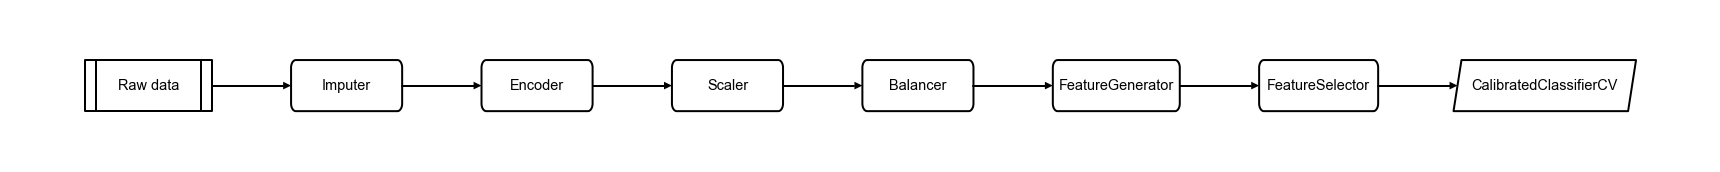

In [44]:
atom.CatB_osdfs_fsel66.plot_pipeline()

# Optimizing Hyperparameters 

In [47]:
atom.run(models = "CatB"+"Hyper", n_calls=5, n_initial_points=4, n_bootstrap=3, metric=("F1"))

EntitySet scattered to 8 workers in 5 seconds
EntitySet scattered to 8 workers in 5 seconds
EntitySet scattered to 8 workers in 7 seconds
EntitySet scattered to 8 workers in 5 seconds
EntitySet scattered to 8 workers in 8 seconds
EntitySet scattered to 8 workers in 7 seconds
EntitySet scattered to 8 workers in 5 seconds
EntitySet scattered to 8 workers in 8 seconds
EntitySet scattered to 8 workers in 7 seconds
EntitySet scattered to 8 workers in 9 seconds


In [49]:
atom.CatBHyper.calibrate(cv=4)

In [46]:
atom.CatB_osdfs_fsel66.pipeline.tolist()

[Imputer(strat_num='median'),
 Encoder(max_onehot=5),
 Scaler(strategy='robust'),
 Balancer(n_jobs=8, random_state=48, strategy='smote'),
 FeatureGenerator(n_features=20, n_jobs=8, operators=['add', 'mul', 'sub'],
                  random_state=48),
 FeatureSelector(n_features=66, n_jobs=8, random_state=48, solver='RF_class',
                 strategy='RFE')]

In [51]:
atom.CatBHyper.evaluate

<bound method BaseModel.evaluate of CatBoost
 --> Estimator: CalibratedClassifierCV
 --> Evaluation: f1: 0.8152>

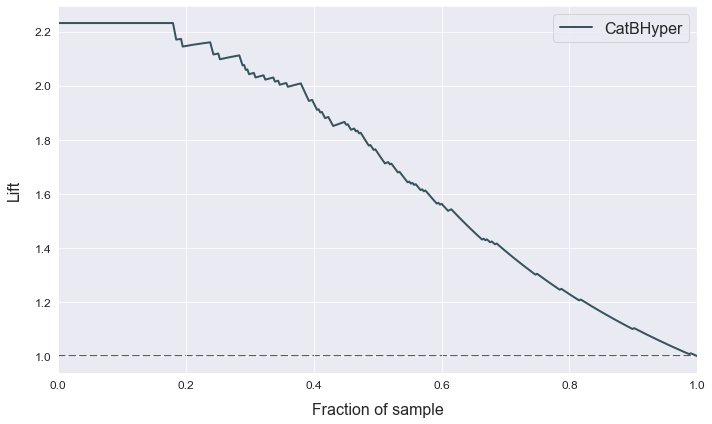

In [52]:
atom.CatBHyper.plot_lift()

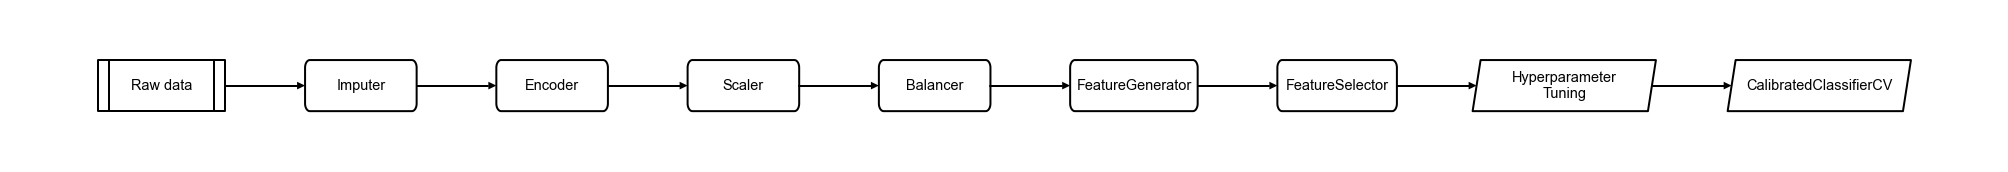

In [53]:
atom.CatBHyper.plot_pipeline()

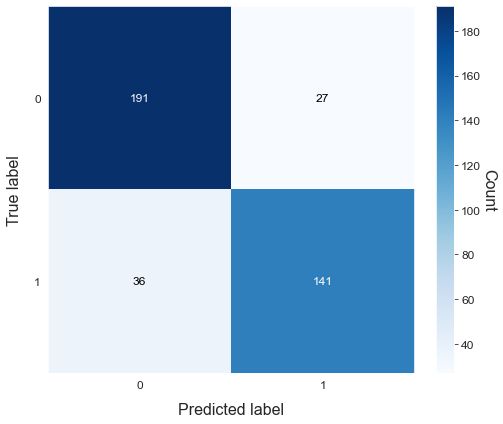

In [54]:
atom.CatBHyper.plot_confusion_matrix()

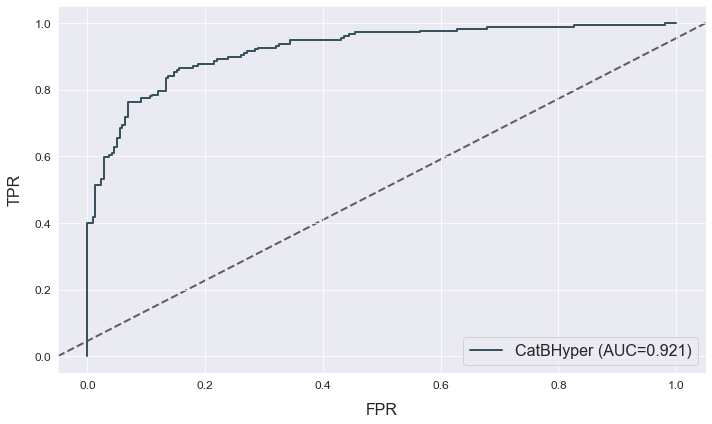

In [55]:
atom.CatBHyper.plot_roc()

# This model is slightly better than the model I created with only the 2nd data. The more data, the more successful the models will be.

# Especially in unevenly distributed datasets, additional natural data is better than generating artificial data with oversampling algorithms.

In [57]:
atom.save("CatBHyper", save_data=False)